# imports for ASO analysis

In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app
from IPython.display import Image, display
import requests

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)


In [2]:
# Create folders to save images and data
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)


In [3]:
# App package IDs to fetch from Google Play
apps = {
    "safari_city": "com.maliyo.safaricity",        # Safari City (Maliyo)
    "homescapes": "com.playrix.homescapes",       # Homescapes (Playrix)
    "township": "com.playrix.township",           # Township (Playrix)
    "design_home": "com.crowdstar.covetHome",     # Design Home (Crowdstar)
    "matchington": "com.matchington.mansion"     # Matchington Mansion (Magic Tavern)
}

meta = []
for key, pkg in apps.items():
    print("Fetching:", key, pkg)
    info = app(pkg, lang='en', country='us')   # returns a dict with metadata
    meta.append({
        "app_key": key,
        "package": pkg,
        "title": info.get("title"),
        "installs": info.get("minInstalls") or info.get("installs") or None,
        "installs_display": info.get("installs") or str(info.get("minInstalls")) + "+",
        "rating": info.get("score"),
        "total_reviews": info.get("reviews") if info.get("reviews") is not None else None,
        "histogram": info.get("histogram"),
        "last_updated": info.get("updated"),
        "icon": info.get("icon"),
        "screenshots": info.get("screenshots")[:5] if info.get("screenshots") else []
    })

df_meta = pd.DataFrame(meta)
df_meta


Fetching: safari_city com.maliyo.safaricity
Fetching: homescapes com.playrix.homescapes
Fetching: township com.playrix.township
Fetching: design_home com.crowdstar.covetHome
Fetching: matchington com.matchington.mansion


,app_key,package,title,installs,installs_display,rating,total_reviews,histogram,last_updated,icon,screenshots
0,safari_city,com.maliyo.safaricity,Safari City: Renovate & Design,100000,"100,000+",0.000000,0,"[0, 0, 0, 0, 0]",1757006624,https://play-lh.googleusercontent.com/JxTLfwul...,[https://play-lh.googleusercontent.com/37PcPVV...
1,homescapes,com.playrix.homescapes,Homescapes,100000000,"100,000,000+",4.720657,367192,"[282804, 99122, 228156, 1767672, 10697996]",1758561819,https://play-lh.googleusercontent.com/HWVNuIGO...,[https://play-lh.googleusercontent.com/bwNWcXP...
2,township,com.playrix.township,Township,100000000,"100,000,000+",4.773094,363532,"[392743, 104176, 165262, 570755, 11040065]",1757580576,https://play-lh.googleusercontent.com/87ZWG0h0...,[https://play-lh.googleusercontent.com/bW2mxlL...
3,design_home,com.crowdstar.covetHome,Design Home™: House Makeover,50000000,"50,000,000+",4.351373,202325,"[70942, 45214, 87130, 195235, 817767]",1757016044,https://play-lh.googleusercontent.com/bgLDbrd8...,[https://play-lh.googleusercontent.com/AkFyLpi...
4,matchington,com.matchington.mansion,Matchington Mansion,100000000,"100,000,000+",4.443578,103759,"[125809, 64739, 133308, 346569, 1685097]",1758114364,https://play-lh.googleusercontent.com/p7mC798F...,[https://play-lh.googleusercontent.com/UPLYkab...


In [4]:
# Save a CSV snapshot
df_meta.to_csv("data/competitors_meta.csv", index=False)
df_meta

,app_key,package,title,installs,installs_display,rating,total_reviews,histogram,last_updated,icon,screenshots
0,safari_city,com.maliyo.safaricity,Safari City: Renovate & Design,100000,"100,000+",0.000000,0,"[0, 0, 0, 0, 0]",1757006624,https://play-lh.googleusercontent.com/JxTLfwul...,[https://play-lh.googleusercontent.com/37PcPVV...
1,homescapes,com.playrix.homescapes,Homescapes,100000000,"100,000,000+",4.720657,367192,"[282804, 99122, 228156, 1767672, 10697996]",1758561819,https://play-lh.googleusercontent.com/HWVNuIGO...,[https://play-lh.googleusercontent.com/bwNWcXP...
2,township,com.playrix.township,Township,100000000,"100,000,000+",4.773094,363532,"[392743, 104176, 165262, 570755, 11040065]",1757580576,https://play-lh.googleusercontent.com/87ZWG0h0...,[https://play-lh.googleusercontent.com/bW2mxlL...
3,design_home,com.crowdstar.covetHome,Design Home™: House Makeover,50000000,"50,000,000+",4.351373,202325,"[70942, 45214, 87130, 195235, 817767]",1757016044,https://play-lh.googleusercontent.com/bgLDbrd8...,[https://play-lh.googleusercontent.com/AkFyLpi...
4,matchington,com.matchington.mansion,Matchington Mansion,100000000,"100,000,000+",4.443578,103759,"[125809, 64739, 133308, 346569, 1685097]",1758114364,https://play-lh.googleusercontent.com/p7mC798F...,[https://play-lh.googleusercontent.com/UPLYkab...


# Reference Images(From Play Store)

=== Safari City: Renovate & Design ===


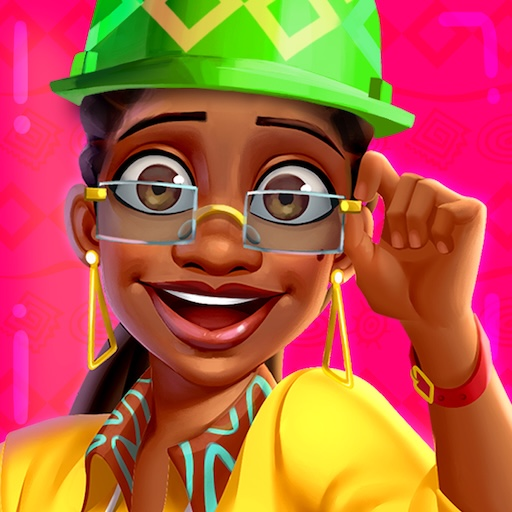

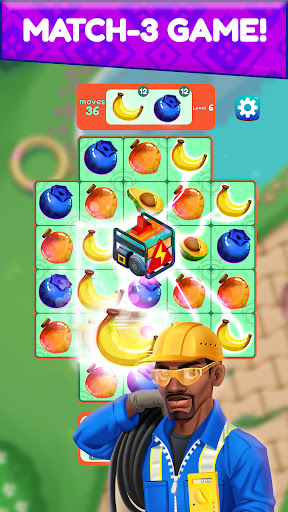

=== Homescapes ===


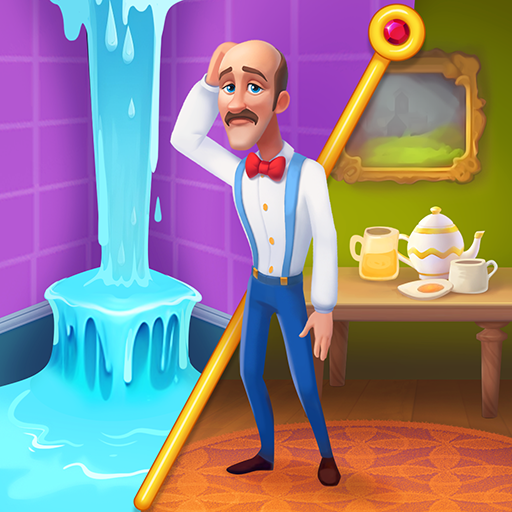

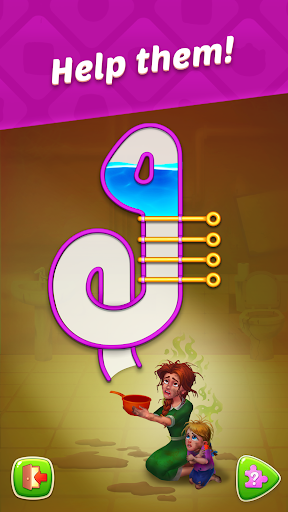

=== Township ===


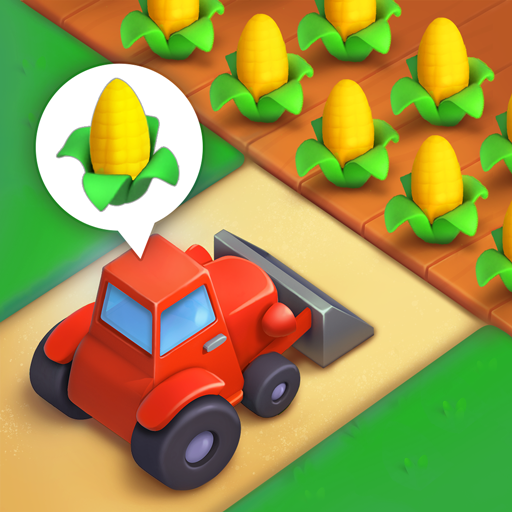

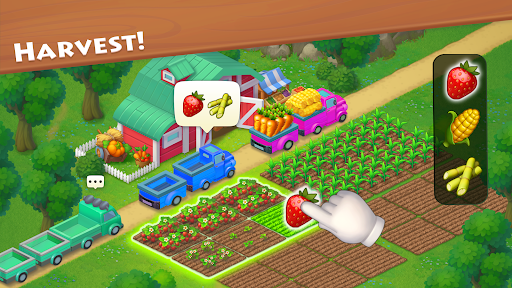

=== Design Home™: House Makeover ===


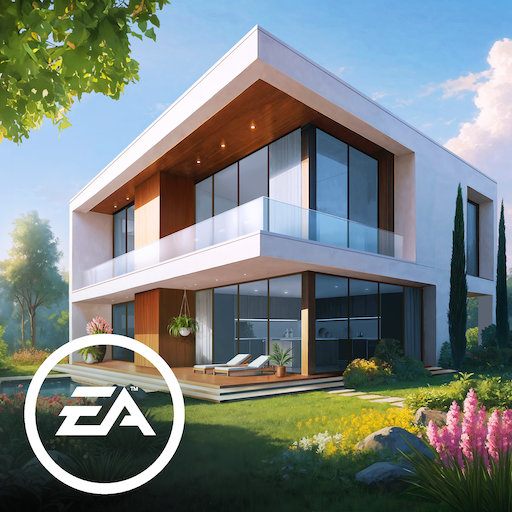

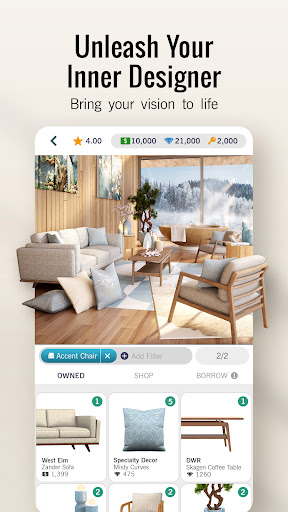

=== Matchington Mansion ===


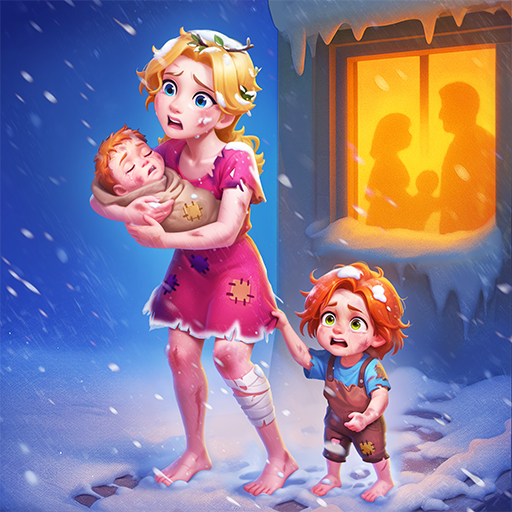

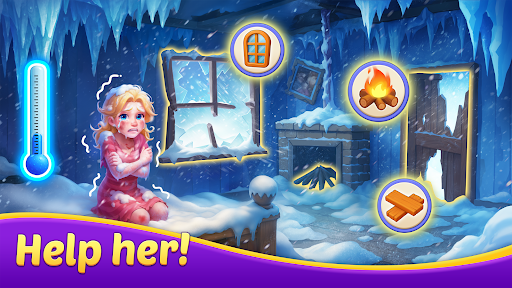

In [5]:
def download_image(url, path):
    try:
        r = requests.get(url, stream=True, timeout=15)
        if r.status_code == 200:
            with open(path, 'wb') as f:
                for chunk in r.iter_content(1024):
                    f.write(chunk)
            return True
    except Exception as e:
        print("Error downloading", url, e)
    return False

for idx, row in df_meta.iterrows():
    key = row['app_key']
    # icon
    if row['icon']:
        icon_path = f"images/{key}_icon.png"
        download_image(row['icon'], icon_path)
    # first screenshot (if available)
    if row['screenshots']:
        ss0 = row['screenshots'][0]
        ss_path = f"images/{key}_ss0.png"
        download_image(ss0, ss_path)

# Display saved images inline to verify
for idx, row in df_meta.iterrows():
    key = row['app_key']
    icon_path = f"images/{key}_icon.png"
    ss_path = f"images/{key}_ss0.png"
    print("===", row['title'], "===")
    if os.path.exists(icon_path):
        display(Image(icon_path, width=128))
    if os.path.exists(ss_path):
        display(Image(ss_path, width=400))


# Data Cleaning

In [6]:
# Some fields may be None — make safe columns for plotting
df = df_meta.copy()

# If minInstalls is present: use it to create numeric installs
def to_numeric_installs(row):
    v = row.get('installs')
    if v:
        # '100,000,000+' -> strip non-digits and plus
        import re
        digits = re.sub(r'[^0-9]','', v)
        return int(digits) if digits else None
    if row.get('installs') is None and row.get('installs_display'):
        # fallback: try minInstalls
        return row.get('installs') or row.get('minInstalls') or None
    return row.get('installs') or row.get('minInstalls')

# prefer minInstalls numeric if exists:
df['numeric_installs'] = df['installs'].fillna(df['installs']).copy()
# google_play_scraper returns minInstalls as int in 'installs' or 'minInstalls' depending on version; try both:
df['numeric_installs'] = df_meta.apply(lambda r: r['installs'] if isinstance(r['installs'], int) else r.get('minInstalls'), axis=1)
# ensure numeric
df['numeric_installs'] = df['numeric_installs'].astype('Int64')

# rating and total_reviews
df['rating'] = df['rating'].astype(float)
# if 'total_reviews' is missing, try pulling from histogram total (if available)
def hist_total(h):
    try:
        return sum([int(x) for x in h.values()]) if isinstance(h, dict) else None
    except:
        return None

df['total_reviews'] = df.apply(lambda r: r['total_reviews'] if (r['total_reviews'] not in (None, 0)) else hist_total(r['histogram']), axis=1)
df['total_reviews'] = df['total_reviews'].astype('Int64')

df[['title','numeric_installs','rating','total_reviews','last_updated']]


,title,numeric_installs,rating,total_reviews,last_updated
0,Safari City: Renovate & Design,100000,0.000000,<NA>,1757006624
1,Homescapes,100000000,4.720657,367192,1758561819
2,Township,100000000,4.773094,363532,1757580576
3,Design Home™: House Makeover,50000000,4.351373,202325,1757016044
4,Matchington Mansion,100000000,4.443578,103759,1758114364


# Installs vs Ratings

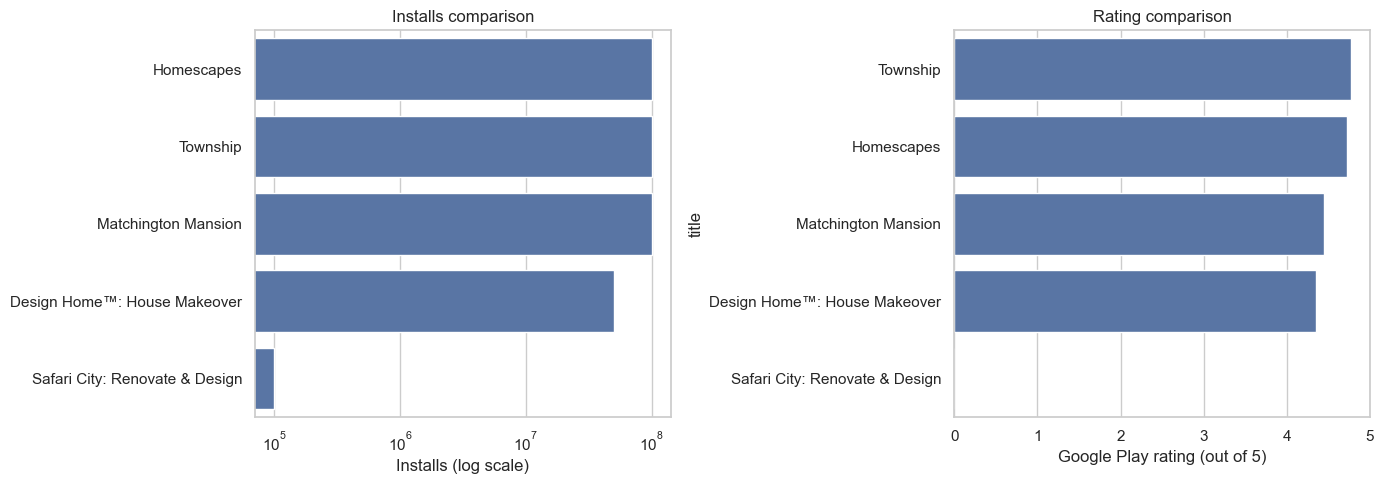

In [15]:
# Simple bar charts for comparison
fig, ax = plt.subplots(1,2, figsize=(14,5))
# installs (log scale because installs vary widely)
sns.barplot(y='title', x='numeric_installs', data=df.sort_values('numeric_installs', ascending=False), ax=ax[0])
ax[0].set_xscale('log')
ax[0].set_xlabel('Installs (log scale)')
ax[0].set_ylabel('')
ax[0].set_title('Installs comparison')

# rating
sns.barplot(y='title', x='rating', data=df.sort_values('rating', ascending=False), ax=ax[1])
ax[1].set_xlim(0,5)
ax[1].set_xlabel('Google Play rating (out of 5)')
ax[1].set_title('Rating comparison')

plt.tight_layout()
plt.savefig("figures/aso_installs_ratings.png")
plt.show()


# Total Reviews Comparism

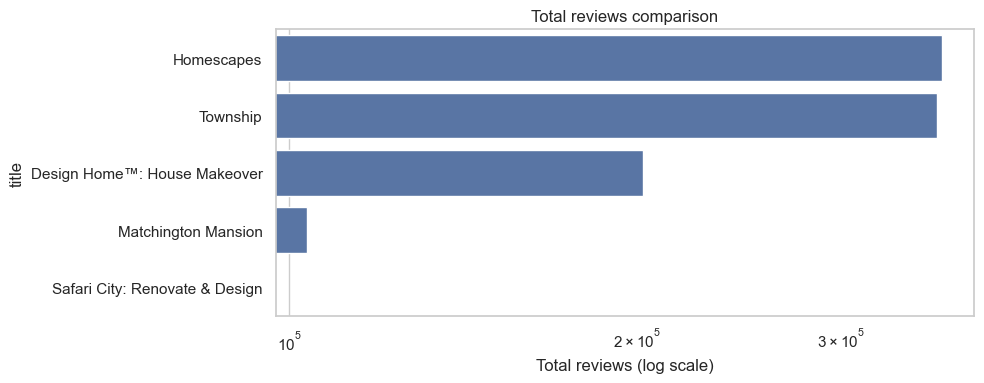

In [9]:
# Plot total reviews (as log)
plt.figure(figsize=(10,4))
sns.barplot(y='title', x='total_reviews', data=df.sort_values('total_reviews', ascending=False))
plt.xscale('log')
plt.xlabel('Total reviews (log scale)')
plt.title('Total reviews comparison')
plt.tight_layout()
plt.savefig("figures/aso_total_reviews.png")
plt.show()

# ASO table

In [16]:
aso_rows = []
for idx,row in df.iterrows():
    title = row['title'] or ""
    title_len = len(title)
    # keyword presence examples: "renovate", "design", "match-3", "city"
    keywords = ['design','renovate','match','home','city','puzzle','decor']
    title_keywords = [k for k in keywords if k.lower() in title.lower()]
    aso_rows.append({
        'title': title,
        'title_len': title_len,
        'title_keywords': ", ".join(title_keywords),
        'last_updated': row['last_updated']
    })

aso_df = pd.DataFrame(aso_rows)
aso_df


,title,title_len,title_keywords,last_updated
0,Safari City: Renovate & Design,30,"design, renovate, city",1757006624
1,Homescapes,10,home,1758561819
2,Township,8,,1757580576
3,Design Home™: House Makeover,28,"design, home",1757016044
4,Matchington Mansion,19,match,1758114364


## ASO & Competitor Commentary

**Strengths (Safari City):**
- Unique African cultural theme and story-driven home renovation experience (visible in app description & screenshots). This differentiator is a strong marketing point vs large global titles. :contentReference[oaicite:6]{index=6}
- Recent update (Sep 4, 2025) mentions smoother early levels and refreshed onboarding, which addresses onboarding friction observed in reviews. :contentReference[oaicite:7]{index=7}

**Weaknesses (Safari City):**
- Lower installs and far fewer reviews than top competitors (e.g., Homescapes, Township, Matchington have 100M+ installs and millions of reviews), which reduces visibility and social proof on the Play Store. :contentReference[oaicite:8]{index=8}
- Fewer reviews means smaller sample size for sentiment analysis and smaller visibility in Play Store ranking signals.

**ASO quick wins:**
1. Title & short description: include high-value keywords such as "design", "renovate", "match-3" where natural. (Check current title for keywords.) :contentReference[oaicite:9]{index=9}  
2. Use the most compelling screenshots (show design before/after and major characters) — these are already present but prioritize the best 3 in the first screenshot slots. :contentReference[oaicite:10]{index=10}  
3. Encourage more reviews from engaged players (in-app prompt after a successful renovation) — this increases social proof and ASO.  

**How Safari City compares (short):**
- **Audience & scale:** Safari City is a small but promising title (100K+ installs) compared to category leaders with 100M+. :contentReference[oaicite:11]{index=11}  
- **Perception:** Ratings are good overall (majority 5-star reviews) but limited sample size. Post-update trend suggests improvement but needs more reviews for statistical significance. (See pre/post analysis in other notebook.) :contentReference[oaicite:12]{index=12}

**Next steps for Maliyo (if internal telemetry becomes available):**
- Instrument an onboarding funnel in analytics (events: install → tutorial_start → tutorial_complete → level_1_complete) and track D1 / D7 retention by cohort.  
- A/B test tutorial length & reward at completion—measure lift in tutorial completion and D1 retention.  
- Track ad impressions/rewarded ad success rates to address ad complaints in reviews.
